# Estacionariedad y retrasos temporales

En este notebook profundizaremos sobre la estacionariedad y los retrasos temporales (o lags). Recordemos que la condición de estacionariedad será algo que deben cumplir nuestras series temporales antes de utilizar un modelo de autorregresión, ya que en el fondo es un modelo lineal, y la independencia entre variables es una de las condiciones necesarias para que sean correctas las predicciones.

## Estacionariedad

Para poder modelar una serie temporal necesitamos que sea estacionaria, lo que significa que sus estadísticos no cambien con el tiempo. Es decir, que ni la media, ni la varianza, ni la covarianza varíen según nos movamos en el eje temporal.

Veamos en un ejemplo de cómo comprobar si una serie es estacionaria en media y, en caso contrario, qué tenemos que hacer para convertirla.

Para comenzar, cargaremos los datos que vamos a utilizar, que son datos de la evolución de acciones:

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

series = pd.read_csv('data/FB.csv', header=0, index_col=0)
series.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


Representamos la serie:

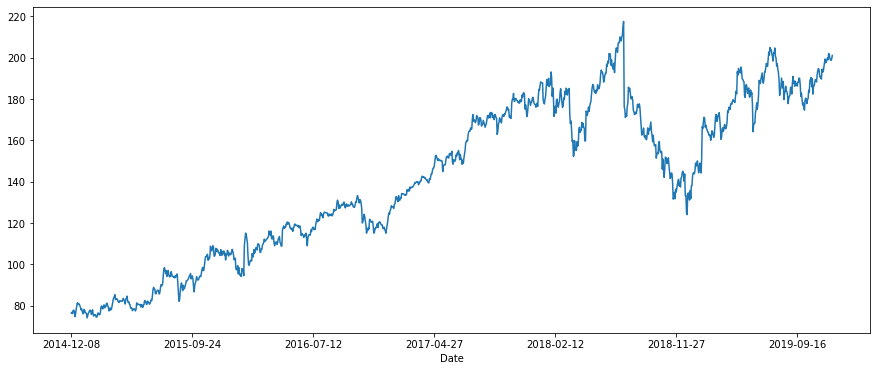

In [134]:
series['Close'].plot(figsize=(15,6));

Como podemos observar, no es estacionaria, ya que presenta una tendencia, y la varianza no se manteiene a lo largo de la serie temporal

Si calculamos sus estadísticos a lo largo de diferentes ventanas, podemos comprobar que, si son diferentes y observamos cierta tendencia, no es estacionaria:

In [135]:
len(series)/4

314.75

In [136]:
series['Close'].describe()

count    1259.000000
mean      141.441628
std        38.183670
min        74.050003
25%       109.729999
50%       143.679993
75%       176.259995
max       217.500000
Name: Close, dtype: float64

In [137]:
for i in range(0, 4):
    print(series.iloc[i*(int(len(series)/4)):(i+1)*(int(len(series)/4))]['Close'].describe())

count    314.000000
mean      90.290701
std       11.069608
min       74.050003
25%       80.472501
50%       89.319999
75%       99.637499
max      115.089996
Name: Close, dtype: float64
count    314.000000
mean     126.634236
std       11.669182
min      107.320000
25%      117.597502
50%      124.625000
75%      133.809997
max      153.630005
Name: Close, dtype: float64
count    314.000000
mean     176.281974
std       13.199269
min      148.429993
25%      169.409999
50%      176.110001
75%      183.605004
max      217.500000
Name: Close, dtype: float64
count    314.000000
mean     172.002930
std       19.874711
min      124.059998
25%      158.970005
50%      176.560005
75%      188.422497
max      204.869995
Name: Close, dtype: float64


Como podemos comprobar, los estadísticos cambian bastante, por lo que ya tenemos otra prueba de que no estamos tratando con una serie estacionaria.

Finalmente, vamos a comprobarlo de la tercera forma que hemos visto, que será la forma más precisa: un test de raíz unitaria.

En este caso, el test que vamos a seguir para comprobar si la serie temporal es estacionaria en media o no, es el test de Dickey-Fuller.

El test de DF plantea la hipótesis nula de que la serie NO es estacionaria. Se trata de comprobar sus p-values, si quedan por encima o por debajo su nivel de significación (0.05):
 *  Si queda por encima de su nivel de significación, aceptamos la hipótesis nula y concluimos que la serie NO es estacionaria.
 *  Si NO queda por encima, rechazaríamos la hipótesis nula en favor de la hipótesis alternativa, con la que concluiremos que la serie es estacionaria.

In [138]:
from statsmodels.tsa.stattools import adfuller

adfuller(series['Close'])[1]

0.6115683442065493

Como queda por encima del nivel de significación (0.61 > 0.05), no es estacionaria.

Para solucionar esto, podemos diferenciar la serie. Normalmente, con una diferenciación de 1 es suficiente. Veamos qué ocurre en este caso:

In [139]:
series2 = series[['Close']].copy()
series2['close_diff_1'] = series2['Close'].diff(1)
series2['close_diff_2'] = series2['Close'].diff(2)
series2.head()

,Close,close_diff_1,close_diff_2
Date,,,
2014-12-08,76.519997,NaN,NaN
2014-12-09,76.839996,0.319999,NaN
2014-12-10,76.180000,-0.659996,-0.339997
2014-12-11,77.730003,1.550003,0.890007
2014-12-12,77.830002,0.099999,1.650002


Representamos la diferenciación de 1:

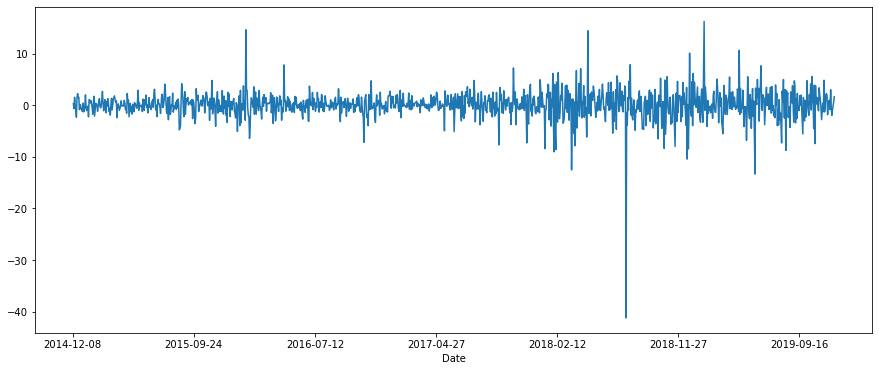

In [140]:
series2['close_diff_1'].plot(figsize=(15,6));

Ahora calculamos sus estadísticos de nuevo:

In [141]:
for i in range(0, 4):
    print(series2.iloc[i*(int(len(series2)/4)):(i+1)*(int(len(series2)/4))]['close_diff_1'].describe())

count    313.000000
mean       0.093962
std        1.798327
min       -6.419998
25%       -0.879997
50%        0.080002
75%        1.059998
max       14.660004
Name: close_diff_1, dtype: float64
count    314.000000
mean       0.149299
std        1.418975
min       -7.169998
25%       -0.570000
50%        0.120003
75%        0.967503
max        7.840004
Name: close_diff_1, dtype: float64
count    314.000000
mean       0.058440
std        3.658343
min      -41.240005
25%       -1.155003
50%        0.245002
75%        1.747501
max       14.470002
Name: close_diff_1, dtype: float64
count    314.000000
mean       0.088089
std        3.206588
min      -13.320007
25%       -1.534997
50%        0.079994
75%        1.965004
max       16.270004
Name: close_diff_1, dtype: float64


Ya que hemos diferenciado, y supuestamente ahora la serie es estacionaria, vamos a volver a probar con el test de Dickey-Fuller

In [142]:
adfuller(series2['close_diff_1'].dropna())[1]

0.0

### Ejemplo diferencias tendencia y estacionalidad:

In [143]:
df = pd.read_csv("ejercicios/data/df_furniture.csv")
min_fecha = df['Month'].dropna().sort_values(ascending=True).iloc[0]
max_fecha = df['Month'].dropna().sort_values(ascending=False).iloc[0]
df['Month'] = pd.date_range(min_fecha, max_fecha, freq = 'MS')
df['date_str'] = df['Month'].astype(str)
df['year'] = df['date_str'].apply(lambda x: int(x[:4]))
df['month'] = df['date_str'].apply(lambda x: int(x[5:7]))
df['day'] = df['date_str'].apply(lambda x: int(x[8:]))
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df_new = df.copy().set_index('date')

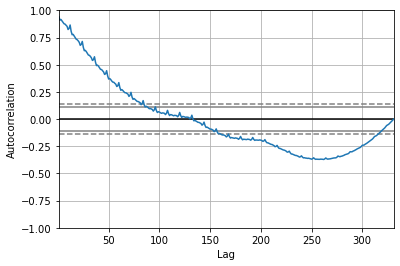

In [144]:
autocorrelation_plot(df_new['furniture_price_adjusted'])

In [145]:
df_new['no_estacional'] = df_new['furniture_price_adjusted'].diff(1)

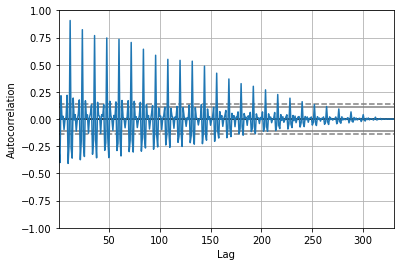

In [146]:
autocorrelation_plot(df_new['no_estacional'].dropna())

In [147]:
df_new['no_estacional'] = df_new['furniture_price_adjusted'].diff(12)

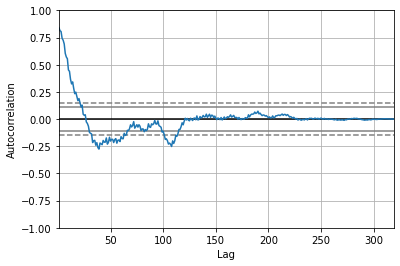

In [148]:
autocorrelation_plot(df_new['no_estacional'].dropna())

In [149]:
df_new['no_estacional'] = df_new['furniture_price_adjusted'].diff(1).diff(12)

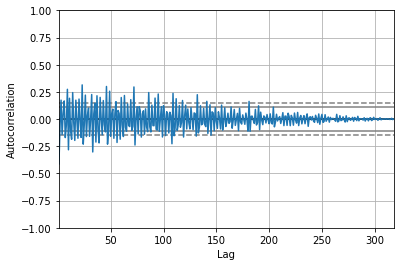

In [150]:
autocorrelation_plot(df_new['no_estacional'].dropna())

#### EJERCICIO
Ahora utilizaremos los datos 'Mean_Temp_IMD_2017.csv', dentro de la carpeta 'data'.

1. Lee los datos del csv y quédate con el eje temporal y la columna ``ANNUAL_AVG_TEMPRATURE``
2. Representa estos datos
3. Calcula estadísticamente si es estacionaria o no (con el test)
4. Si no es estacionaria, aplica diferencias para volverla estacionaria y compruébalo con el test correspondiente, y represéntala

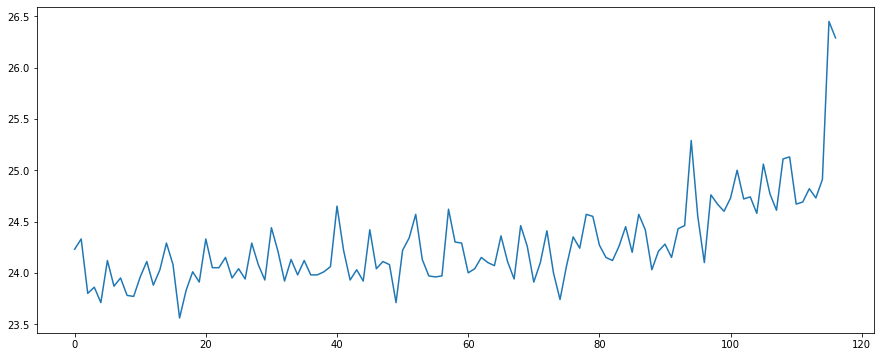

In [151]:
df= pd.read_csv('data/Mean_Temp_IMD_2017.csv')
df.set_index('YEAR')
df['ANNUAL_AVG_TEMPRATURE'].plot(figsize=(15,6))

In [152]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['ANNUAL_AVG_TEMPRATURE'].values, autolag = 'AIC')
result[1]

0.9988258605401505

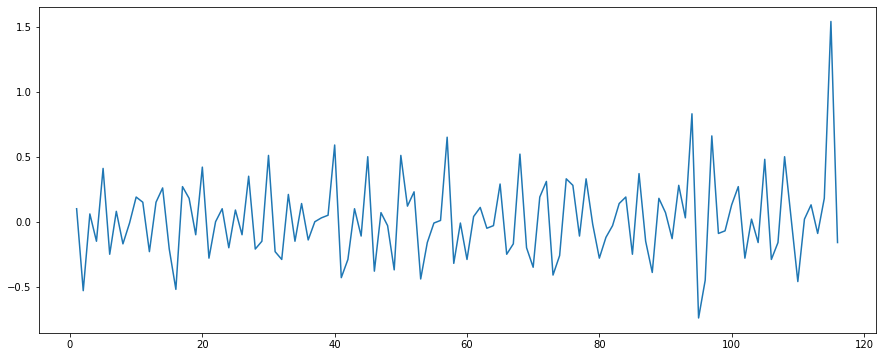

In [153]:
df2 = df[['ANNUAL_AVG_TEMPRATURE']].copy()
df2['ANNUAL_AVG_TEMPRATURE'] = df2['ANNUAL_AVG_TEMPRATURE'].diff(1)
df2['ANNUAL_AVG_TEMPRATURE'].plot(figsize=(15,6));

In [154]:
df2

,ANNUAL_AVG_TEMPRATURE
0,NaN
1,0.10
2,-0.53
3,0.06
4,-0.15
...,...
112,0.13
113,-0.09
114,0.18
115,1.54


In [114]:
result2 = adfuller(df2['ANNUAL_AVG_TEMPRATURE'].dropna(), autolag = 'AIC')
result2[1]

1.1330500609685063e-12

## Lag
Un lag es un retraso en el tiempo. Se utiliza este concepto para ver la relación que tiene cada instante de un time series con instantes anteriores.

Se pueden calcular mediante el método ``shift()``:

In [116]:
df['ANNUAL_AVG_TEMPRATURE'].shift(5)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
112    24.61
113    25.11
114    25.13
115    24.67
116    24.69
Name: ANNUAL_AVG_TEMPRATURE, Length: 117, dtype: float64

In [117]:
df['lag1'] = df['ANNUAL_AVG_TEMPRATURE'].shift(1)
df['lag2'] = df['ANNUAL_AVG_TEMPRATURE'].shift(2)
df['lag3'] = df['ANNUAL_AVG_TEMPRATURE'].shift(3)
df['lag4'] = df['ANNUAL_AVG_TEMPRATURE'].shift(4)
df['lag5'] = df['ANNUAL_AVG_TEMPRATURE'].shift(5)
df.head(10)

,YEAR,ANNUAL_AVG_TEMPRATURE,lag1,lag2,lag3,lag4,lag5
0,1901,24.23,NaN,NaN,NaN,NaN,NaN
1,1902,24.33,24.23,NaN,NaN,NaN,NaN
2,1903,23.80,24.33,24.23,NaN,NaN,NaN
3,1904,23.86,23.80,24.33,24.23,NaN,NaN
4,1905,23.71,23.86,23.80,24.33,24.23,NaN
5,1906,24.12,23.71,23.86,23.80,24.33,24.23
6,1907,23.87,24.12,23.71,23.86,23.80,24.33
7,1908,23.95,23.87,24.12,23.71,23.86,23.80
8,1909,23.78,23.95,23.87,24.12,23.71,23.86
9,1910,23.77,23.78,23.95,23.87,24.12,23.71


Como los algoritmos de regresión en time series dependen de instantes anteriores, hay que intentar evitar que los lags estén muy autocorrelados, por que sino sufriremos de multicolinearidad.

Vamos a comprobar cuánto de correlados están los lags

In [118]:
df.corr()

,YEAR,ANNUAL_AVG_TEMPRATURE,lag1,lag2,lag3,lag4,lag5
YEAR,1.000000,0.671285,0.676106,0.702245,0.693353,0.686518,0.677809
ANNUAL_AVG_TEMPRATURE,0.671285,1.000000,0.709562,0.519207,0.559016,0.543152,0.541317
lag1,0.676106,0.709562,1.000000,0.630760,0.495757,0.558646,0.529761
lag2,0.702245,0.519207,0.630760,1.000000,0.636485,0.500332,0.560252
lag3,0.693353,0.559016,0.495757,0.636485,1.000000,0.627644,0.484547
lag4,0.686518,0.543152,0.558646,0.500332,0.627644,1.000000,0.619090
lag5,0.677809,0.541317,0.529761,0.560252,0.484547,0.619090,1.000000


Para esto, viene muy bien la función ``lag_plot`` de Pandas, que nos representará el valor de cada valor frente a su valor anterior:

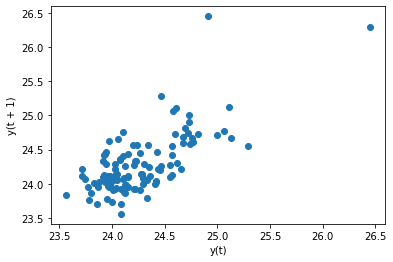

In [120]:
from pandas.plotting import lag_plot

lag_plot(df['ANNUAL_AVG_TEMPRATURE']);

# # Equivalente a:
# plt.plot(series_tmp['ANNUAL_AVG_TEMPRATURE'].shift()[1:], series_tmp['ANNUAL_AVG_TEMPRATURE'][1:], 'bo')

## Autocorrelation plot

Tenemos que ver cómo es la gráfica de autocorrelación, ya que si vamos a utilizar una regresión lineal, no queremos que los lags estén muy correlacionados unos con otros.

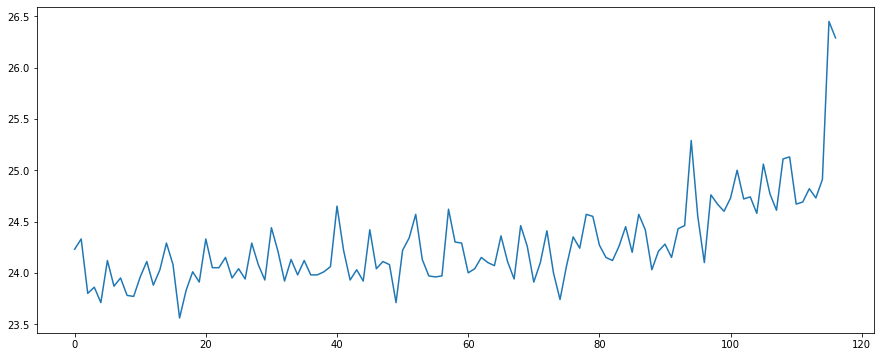

In [121]:
df['ANNUAL_AVG_TEMPRATURE'].plot(figsize=(15,6));

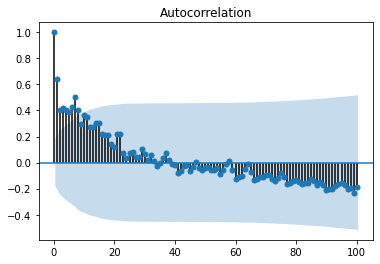

In [123]:
from statsmodels.graphics.tsaplots import plot_acf

#series = pd.read_csv('data/FB.csv', header=0, index_col=0)

plot_acf(df['ANNUAL_AVG_TEMPRATURE'], lags=100);

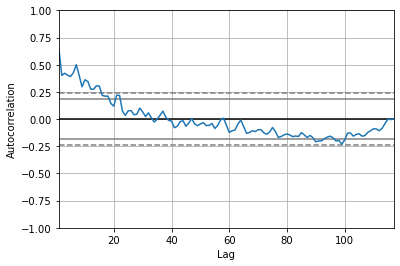

In [124]:
autocorrelation_plot(df['ANNUAL_AVG_TEMPRATURE'])

¿Cómo interpretamos esto? Correlación muy alta entre cada dato y sus lags. Esto es debido a que la serie no es estacionaria.

Diferenciando, reucimos (eliminamos) esa correlación entre los lags, y conseguimos una serie temporal más adecuada para entrenar nuestros modelos.

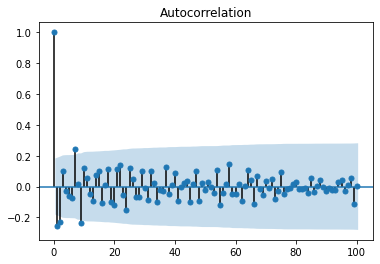

In [156]:
diferencio = df['ANNUAL_AVG_TEMPRATURE'].diff().dropna()

plot_acf(diferencio, lags=100);

Comprobamos gráficamente:

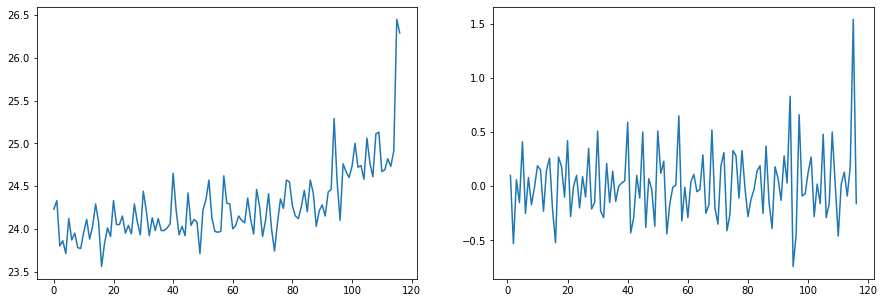

In [129]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(df['ANNUAL_AVG_TEMPRATURE'])

plt.subplot(1, 2, 2)
plt.plot(diferencio)

### EJERCICIO

Prueba lo que acabamos de ver sobre los datos de bolsa y sus lags:
1. Créate una DataFrame con los valores de "Close" y sus 5 primeros lags
2. Calcula la correlación de cada uno de sus lags (cuidado con los nans)
3. Representa los valores de "Close" frente a su valor anterior
4. ¿Cómo puedes visualizar la correlación de los valores de "Close" con sus valores anteriores? Represéntalo
5. ¿Y si queremos eliminar esa correlación, cómo podríamos hacerlo? Representa la autocorrelación para demostrarlo
6. Comprueba los estadísticos a lo largo del tiempo para corroborar que no tiene tendencia


In [166]:
df = pd.read_csv("data/GOOG.csv", parse_dates=['Date'], index_col='Date')
df_close = df.copy()[['Close']]
df_close

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956
...,...
2019-12-27,1351.890015
2019-12-30,1336.140015
2019-12-31,1337.020020


In [168]:
df_close['lag1'] = df_close['Close'].shift(1)
df_close['lag2'] = df_close['Close'].shift(2)
df_close['lag3'] = df_close['Close'].shift(3)
df_close['lag4'] = df_close['Close'].shift(4)
df_close['lag5'] = df_close['Close'].shift(5)

df_close = df_close.dropna()
df_close.head(10)

,Close,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
2010-01-11,299.432648,299.885956,295.940735,302.994293,310.829926,312.204773
2010-01-12,294.137512,299.432648,299.885956,295.940735,302.994293,310.829926
2010-01-13,292.448822,294.137512,299.432648,299.885956,295.940735,302.994293
2010-01-14,293.823669,292.448822,294.137512,299.432648,299.885956,295.940735
2010-01-15,288.917053,293.823669,292.448822,294.137512,299.432648,299.885956
2010-01-19,292.712830,288.917053,293.823669,292.448822,294.137512,299.432648
2010-01-20,289.121307,292.712830,288.917053,293.823669,292.448822,294.137512
2010-01-21,290.401489,289.121307,292.712830,288.917053,293.823669,292.448822
2010-01-22,273.978058,290.401489,289.121307,292.712830,288.917053,293.823669


In [172]:
import seaborn as sns
df_close.corr()

,Close,lag1,lag2,lag3,lag4,lag5
Close,1.000000,0.999463,0.998917,0.998444,0.997965,0.997499
lag1,0.999463,1.000000,0.999463,0.998916,0.998442,0.997962
lag2,0.998917,0.999463,1.000000,0.999463,0.998916,0.998440
lag3,0.998444,0.998916,0.999463,1.000000,0.999463,0.998915
lag4,0.997965,0.998442,0.998916,0.999463,1.000000,0.999462
lag5,0.997499,0.997962,0.998440,0.998915,0.999462,1.000000


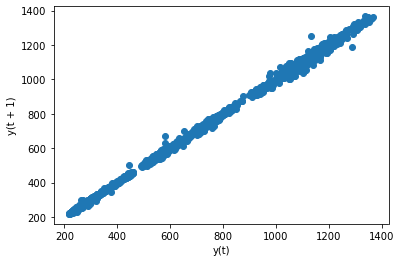

In [173]:
lag_plot(df_close['Close'])

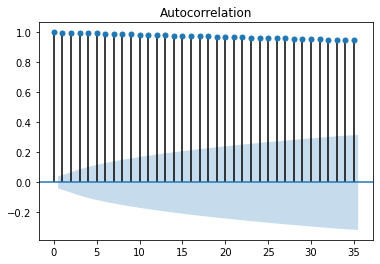

In [175]:
plot_acf(df_close['Close']);

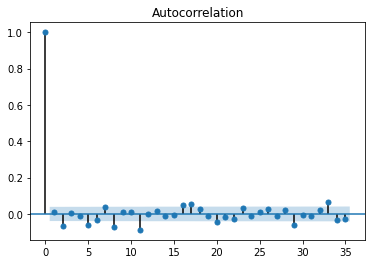

In [182]:
plot_acf(df_close['Close'].diff().dropna());

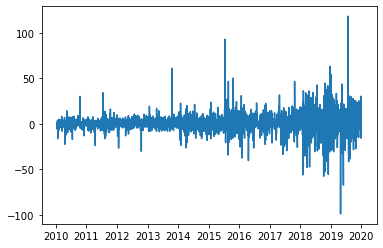

In [184]:
plt.plot(df_close['Close'].diff().dropna());

In [185]:
df_close['dif'] = df_close['Close'].diff()

<ipython-input-185-56494fe21172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['dif'] = df_close['Close'].diff()


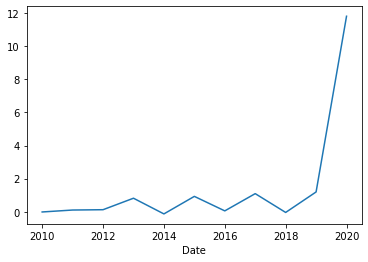

In [204]:
df_close = df_close.dropna()
df_close.groupby(df_close.index.year)['dif'].mean().plot()

In [195]:
df2 = df_close['Close'].diff().dropna()
df2

Date
2010-01-13    -1.688690
2010-01-14     1.374847
2010-01-15    -4.906616
2010-01-19     3.795777
2010-01-20    -3.591523
                ...    
2019-12-27    -8.510009
2019-12-30   -15.750000
2019-12-31     0.880005
2020-01-02    30.349975
2020-01-03    -6.709961
Name: Close, Length: 2511, dtype: float64

In [197]:
df2.groupby(df2.index.year).agg(['mean', 'median'])

,mean,median
Date,,
2010,0.007096,0.104614
2011,0.102651,0.174348
2012,0.122501,0.166886
2013,0.817037,0.074723
2014,-0.132158,-0.069794
2015,0.928259,0.035003
2016,0.051349,0.149994
2017,1.093944,1.290039
2018,-0.042988,1.060058
